# Problem Statement

https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/

https://towardsdatascience.com/decision-trees-for-classification-id3-algorithm-explained-89df76e72df1

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows:
***

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

# Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset loading & Dataset preprocessing-I

In [2]:
data = pd.read_csv('Company_Data.csv')

data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# shape of the data

data.shape

(400, 11)

In [4]:
# checking missing values in the data

data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
# Dropping features which will not helfull to decide 

dataset = data.drop(['CompPrice'], axis=1)

In [7]:
dataset.head()

,Sales,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,64,3,340,128,Bad,38,13,Yes,No


# Step 3: EDA

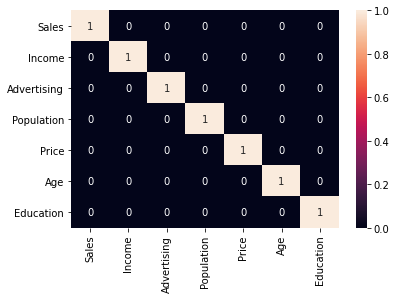

In [8]:
sns.heatmap(dataset.corr()>0.6, annot=True)
plt.show()

summary: There is no high correlation any: i) dependent to indepdent & ii) independent to independent variables

# Step 4: Data preprocessing part-II

In [9]:
# seperating independent & dependent variables

X = dataset.drop(['Sales'], axis = 1)

In [10]:
X = pd.get_dummies(X, drop_first=True)

In [11]:
X.head()

,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,73,11,276,120,42,17,0,0,1,1
1,48,16,260,83,65,10,1,0,1,1
2,35,10,269,80,59,12,0,1,1,1
3,100,4,466,97,55,14,0,1,1,1
4,64,3,340,128,38,13,0,0,1,0


In [12]:
y = pd.DataFrame(dataset['Sales'])
y.head()

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15


 ### Since y is in continous datatype.. we need toconvert it into categorical datatype to build decision tree classifier model. 

       count      mean       std  min   25%   50%   75%    max
Sales  400.0  7.496325  2.824115  0.0  5.39  7.49  9.32  16.27


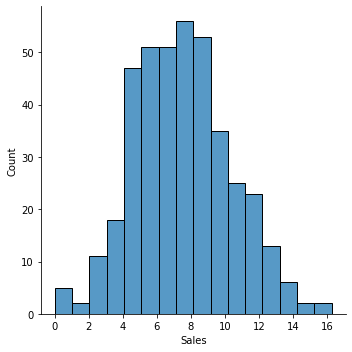

In [13]:
print(y.describe().transpose())

sns.displot(data = y.Sales)
plt.show()

So it is better to select Sales uniot above 8. So that we can get higher contributer to the highest sales unit.

In [14]:
for i in y.Sales:
    if i>8:
        y['Sales'] = y['Sales'].replace(i,'yes')
    else:
        y['Sales'] = y['Sales'].replace(i,'no')

In [15]:
y.head()

,Sales
0,yes
1,yes
2,yes
3,no
4,no


# Feature selection

 ## RFE

In [16]:
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()  
x = st_x.fit_transform(X)    

In [17]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=10)
selector = RFE(estimator, n_features_to_select=6)

selector = selector.fit(x, y)

In [18]:
selector.support_

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False])

In [19]:
# the 1 is for imp features

ranking = selector.ranking_
ranking

array([1, 1, 1, 1, 1, 2, 1, 3, 5, 4])

In [20]:
feature_selection =  pd.DataFrame(zip(X.columns, ranking),columns=['Features', 'Rankings'])

In [21]:
best_columns =[]
for i in feature_selection.loc[feature_selection['Rankings']==1].Features:
    best_columns.append(i)
    
best_columns

['Income', 'Advertising', 'Population', 'Price', 'Age', 'ShelveLoc_Good']

In [22]:
X = X[best_columns]

In [23]:
# feature scaling
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()  
x = st_x.fit_transform(X)    

In [24]:
# Splitting data into train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify =y, random_state = 101)

In [25]:
# data balancing using stratify in train_test split..cross checking

y_train.value_counts(normalize=True)

Sales
no       0.590625
yes      0.409375
dtype: float64

In [26]:
# data balancing using stratify in train_test split..cross checking

y_test.value_counts(normalize=True)

Sales
no       0.5875
yes      0.4125
dtype: float64

# Fitting a Decision-Tree algorithm to the Training set

 ### Decision Tree Algorithms
 ***

 # 1. ID3 i.e crieterian = entropy

Metrics in ID3.

* the ID3 algorithm selects the best feature at each step while building a Decision tree.

* Before you ask, the answer to the question: ‘How does ID3 select the best feature?’ is that ID3 uses Information Gain or just Gain to find the best feature.

* Information Gain calculates the reduction in the entropy and measures how well a given feature separates or classifies the target classes. The feature with the highest Information Gain is selected as the best one.

* In simple words, Entropy is the measure of disorder and the Entropy of a dataset is the measure of disorder in the target feature of the dataset.

* In the case of binary classification (where the target column has only two types of classes) entropy is 0 if all values in the target column are homogenous(similar) and will be 1 if the target column has equal number values for both the classes.

We denote our dataset as S, entropy is calculated as:

 #### Entropy(S) = - ∑ pᵢ * log₂(pᵢ) ; i = 1 to n


where,

n is the total number of classes in the target column (in our case n = 2 i.e YES and NO)

pᵢ is the probability of class ‘i’ or the ratio of “number of rows with class i in the target column” to the “total number of rows” in the dataset.


 #### ID3 Steps:
 ***
 
* Calculate the Information Gain of each feature.


* Considering that all rows don’t belong to the same class, split the dataset S into subsets using the feature for which the Information Gain is maximum.


* Make a decision tree node using the feature with the maximum Information gain.


* If all rows belong to the same class, make the current node as a leaf node with the class as its label.


* Repeat for the remaining features until we run out of all features, or the decision tree has all leaf nodes.

In [27]:
#Fitting Decision Tree classifier to the training set  

# crieterian ='entropy' for ID3 method

from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='entropy', random_state= 10)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [28]:
model1.score(x_train, y_train)

1.0

In [29]:
model1.score(x_test, y_test)

0.7375

In [30]:
model1.feature_importances_

array([0.16461712, 0.17559193, 0.09242705, 0.30567963, 0.13983244,
       0.12185183])

In [31]:
model1.predict(x_test)

array(['no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no'], dtype=object)

In [32]:
y_pred = model1.predict(x_test)

In [33]:
model1

DecisionTreeClassifier(criterion='entropy', random_state=10)

### Hyperparameter tuning

 #### Changing max_depth to improve model accuracy

In [34]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model1 = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 10)
    model1.fit(x_train, y_train)
    train_accuracy.append(model1.score(x_train, y_train))
    test_accuracy.append(model1.score(x_test, y_test))

In [35]:
frame = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})

In [36]:
frame

,max_depth,train_acc,test_acc
0,1,0.715625,0.6750
1,2,0.728125,0.6875
2,3,0.778125,0.8125
3,4,0.821875,0.7750
4,5,0.853125,0.8125
5,6,0.881250,0.8250
6,7,0.893750,0.7625
7,8,0.931250,0.7875
8,9,0.953125,0.7750
9,10,0.959375,0.8125


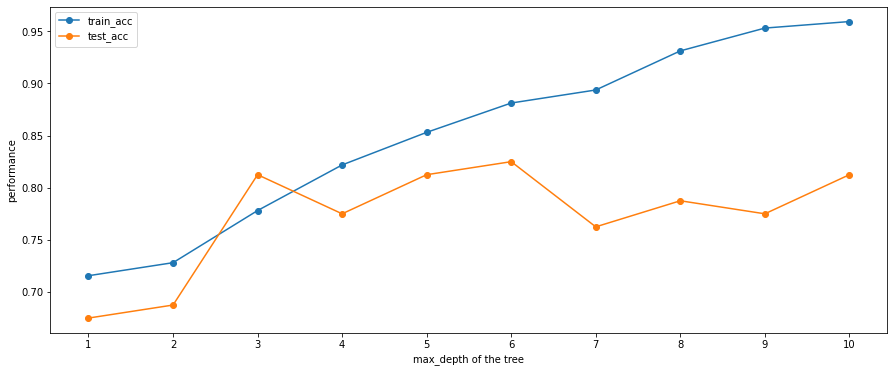

In [37]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(frame['max_depth'], frame['train_acc'], marker = 'o')
plt.plot(frame['max_depth'], frame['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

 #### We can observe that for max_depth is equal to 4 the train & test accuracies are closer together.

### Model Building

In [38]:
model1 = DecisionTreeClassifier(criterion='entropy', random_state=10, max_depth=4)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [39]:
model1.score(x_train, y_train)

0.821875

In [40]:
model1.score(x_test, y_test)

0.775

In [41]:
y_pred = model1.predict(x_test)

### Tree plot

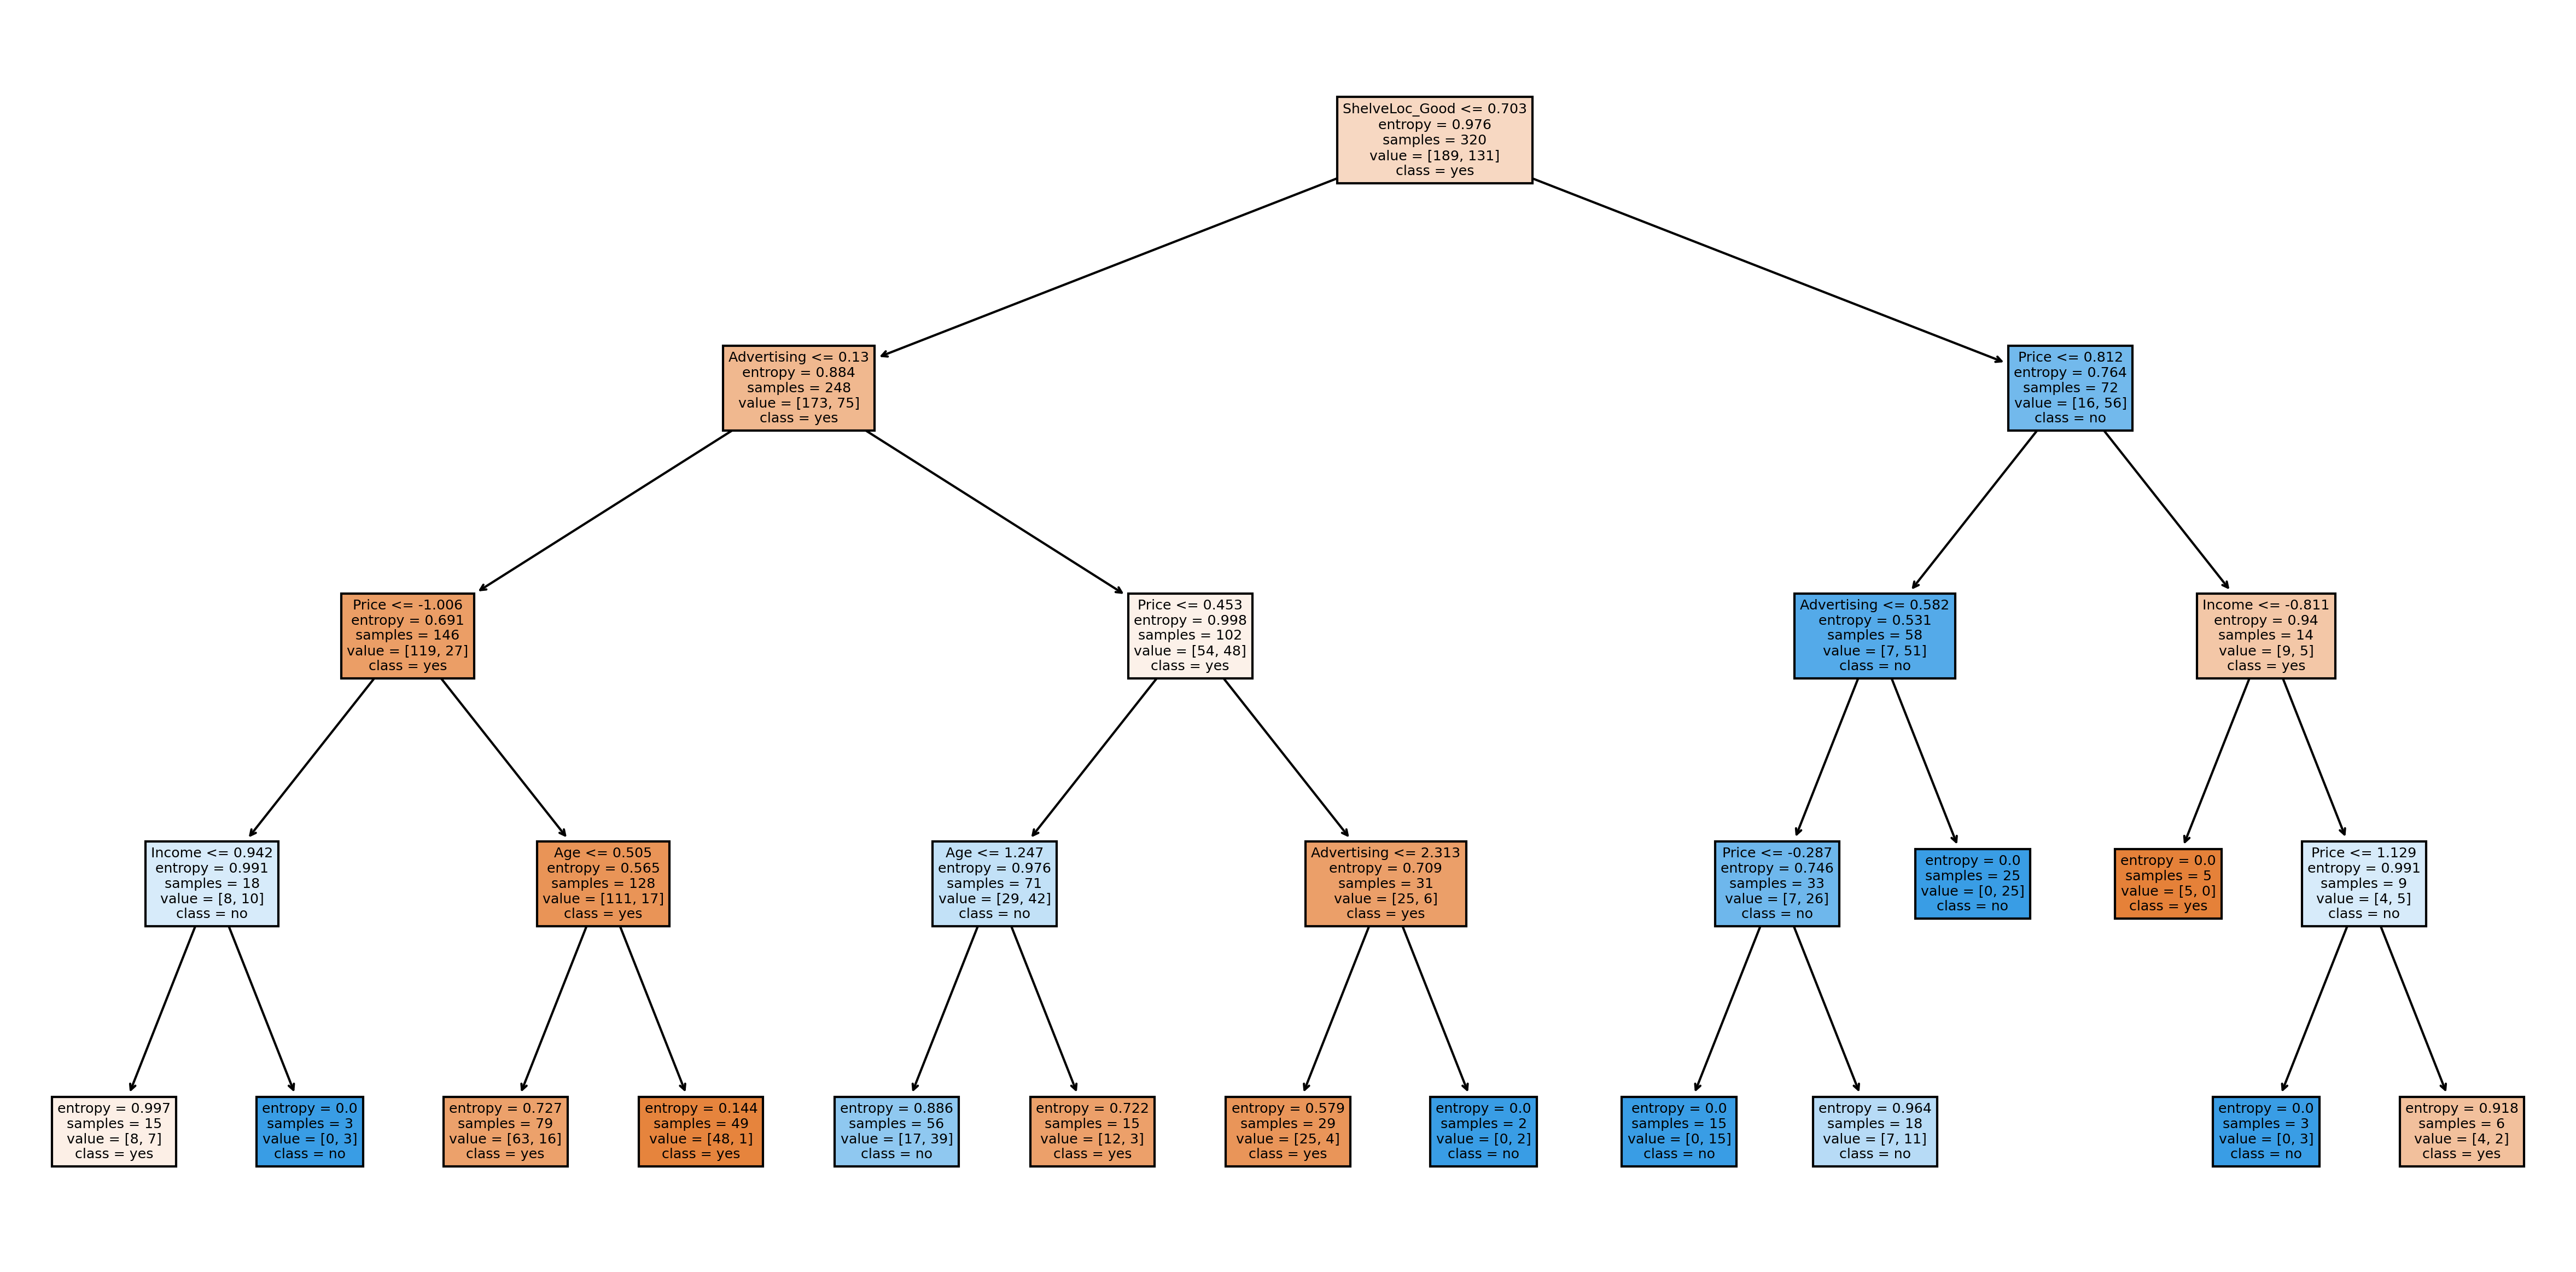

In [42]:
import graphviz 
from sklearn import tree

features = list(X.columns)
classes = list(y.Sales.unique())

fig, axex = plt.subplots(nrows=1, ncols=1,figsize=(20,10), dpi=300)
tree.plot_tree(model1,feature_names= features, class_names=classes, filled=True)
plt.show()
 

In [43]:
from sklearn.tree import export_text
r = export_text(model1, feature_names=features)
print(r)

|--- ShelveLoc_Good <= 0.70
|   |--- Advertising <= 0.13
|   |   |--- Price <= -1.01
|   |   |   |--- Income <= 0.94
|   |   |   |   |--- class: no
|   |   |   |--- Income >  0.94
|   |   |   |   |--- class: yes
|   |   |--- Price >  -1.01
|   |   |   |--- Age <= 0.51
|   |   |   |   |--- class: no
|   |   |   |--- Age >  0.51
|   |   |   |   |--- class: no
|   |--- Advertising >  0.13
|   |   |--- Price <= 0.45
|   |   |   |--- Age <= 1.25
|   |   |   |   |--- class: yes
|   |   |   |--- Age >  1.25
|   |   |   |   |--- class: no
|   |   |--- Price >  0.45
|   |   |   |--- Advertising <= 2.31
|   |   |   |   |--- class: no
|   |   |   |--- Advertising >  2.31
|   |   |   |   |--- class: yes
|--- ShelveLoc_Good >  0.70
|   |--- Price <= 0.81
|   |   |--- Advertising <= 0.58
|   |   |   |--- Price <= -0.29
|   |   |   |   |--- class: yes
|   |   |   |--- Price >  -0.29
|   |   |   |   |--- class: yes
|   |   |--- Advertising >  0.58
|   |   |   |--- class: yes
|   |--- Price >  0.81
|  

### Model Evalution

In [44]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[41,  6],
       [12, 21]], dtype=int64)

In [45]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.77      0.87      0.82        47
         yes       0.78      0.64      0.70        33

    accuracy                           0.78        80
   macro avg       0.78      0.75      0.76        80
weighted avg       0.78      0.78      0.77        80



### Cross validation..

In [46]:
from sklearn.model_selection import cross_val_score
for cv in range(2,10):
    print('for cv=',cv)
    print(np.mean(cross_val_score(model1, x, y, cv=cv)))
    print('-'*10)

for cv= 2
0.6699999999999999
----------
for cv= 3
0.7149964463397298
----------
for cv= 4
0.72
----------
for cv= 5
0.7050000000000001
----------
for cv= 6
0.7123096638022011
----------
for cv= 7
0.7171808832425892
----------
for cv= 8
0.71
----------
for cv= 9
0.7169472502805836
----------


 ### So final best accuracy for this model is 0.72 with cv=3

 # 2. Building Decision Tree suing CART i.e crieterian = Gini

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model2 =DecisionTreeClassifier()
param_grid= {'criterion':['gini'],'splitter':['best'],'max_depth':[i for i in range(1,6)],\
             'min_samples_split':[i for i in range(2,4)],\
             'min_samples_leaf':[1,2,3],\
             'max_features':[i for i in range(5,11)],'random_state':[10]}


grid_search = GridSearchCV(estimator=model2, param_grid =param_grid,\
                           verbose=0, n_jobs=-1, scoring='accuracy', cv = 3)

In [48]:
grid_result = grid_search.fit(x_train, y_train)

In [49]:
grid_result.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 10,
 'splitter': 'best'}

In [50]:
grid_result.best_score_

0.7217128078528184

# Conclusion:

 * the final model accuracy is 0.72
 
 
 * I used the method by converting the depedent variable into categorical datatype with the condition if sales unit>8 then 'yes' otherwise replaced with 'no' 
 
 
 * The criterian used in decision tree is 'entropy' that is ID3 method.

# Post pruning decision tree with cost complexity pruning

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py


https://www.youtube.com/watch?v=SLOyyFHbiqo

this method will help to decide max_depth of tree and max. no. of nodes so that our model will not overfit. that is test accuracy will not more than train it will be closer to train accuracy

In [52]:
# rebuilding model to determine ccp_alphas, impurities. here ccp_alphas will helful to determine
#...max_depth of the tree & impurities will helful to determine no.of nodes in the tree

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=10)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

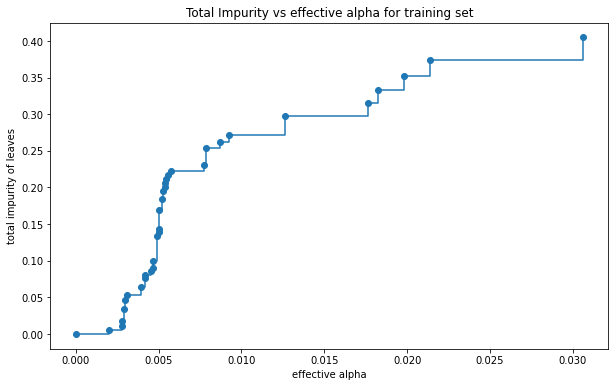

In [53]:
# In the following plot, the maximum effective alpha value is removed, 
#......because it is the trivial tree with only one node. i.e. excluding last element from list

fig = plt.figure(figsize = (10,6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

In [54]:
# Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], 
#...with one node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=10, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
print()

# lets have a look what is in clfs for info..
for i in clfs:
    print(i)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07880551355286741

DecisionTreeClassifier(random_state=10)
DecisionTreeClassifier(ccp_alpha=0.001996527777777779, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.0027777777777777775, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.0027777777777777775, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.0029375000000000004, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.0029464285714285703, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.0030612244897959195, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.003917378917378918, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.004166666666666667, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.004166666666666667, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.004545454545454547, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.0046875, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.0046875, random_state=10)
DecisionTreeClassifier(ccp_alpha=0.00

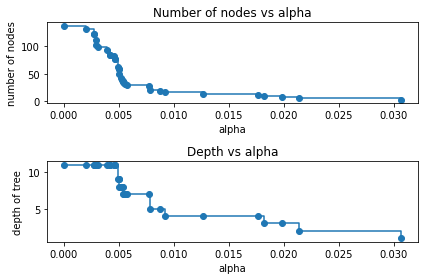

In [55]:
# For the remainder of this example, we remove the last element in clfs and ccp_alphas, 
#...because it is the trivial tree with only one node. Here we show that the number of nodes and 
#..tree depth decreases as alpha increases.

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


 ### Accuracy vs alpha for training and testing sets

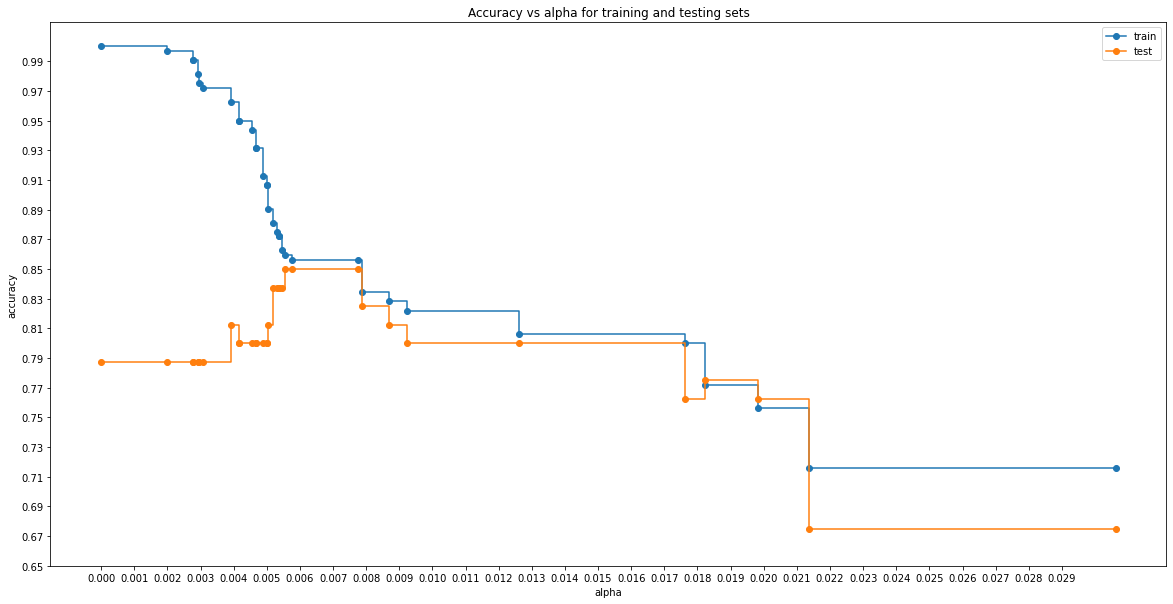

In [56]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.set_xticks(np.arange(0.000,0.030, 0.001))
ax.set_yticks(np.arange(0.65,1.01, 0.02))
ax.legend()
plt.show()

from above graph it is clear that the score difference is minimu and closer together when alph value in between 0.013 to 0.017. So choosing minimum value of alph will gives the best result for max_depth values selection that is for pruning. So we will select 0.013

# Rebuilding model

In [57]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=10, ccp_alpha=0.013)
classifier.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.013, random_state=10)

In [58]:
# checking the training score

classifier.score(x_train, y_train) 

0.80625

In [59]:
# checking the test score

classifier.score(x_test, y_test)

0.8

In [60]:
# predicting the results on x_test

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

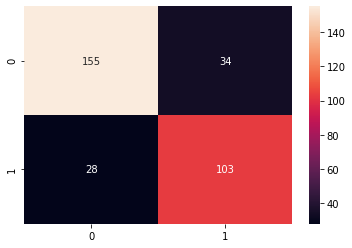

In [61]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='g', )
plt.show()

In [62]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          no       0.85      0.82      0.83       189
         yes       0.75      0.79      0.77       131

    accuracy                           0.81       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.81      0.81      0.81       320



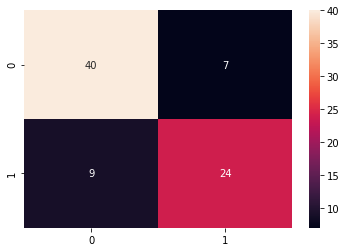

In [63]:
# plotting the confusion matrix.

from sklearn.metrics import confusion_matrix, classification_report

cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True)
plt.show()

In [64]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          no       0.82      0.85      0.83        47
         yes       0.77      0.73      0.75        33

    accuracy                           0.80        80
   macro avg       0.80      0.79      0.79        80
weighted avg       0.80      0.80      0.80        80



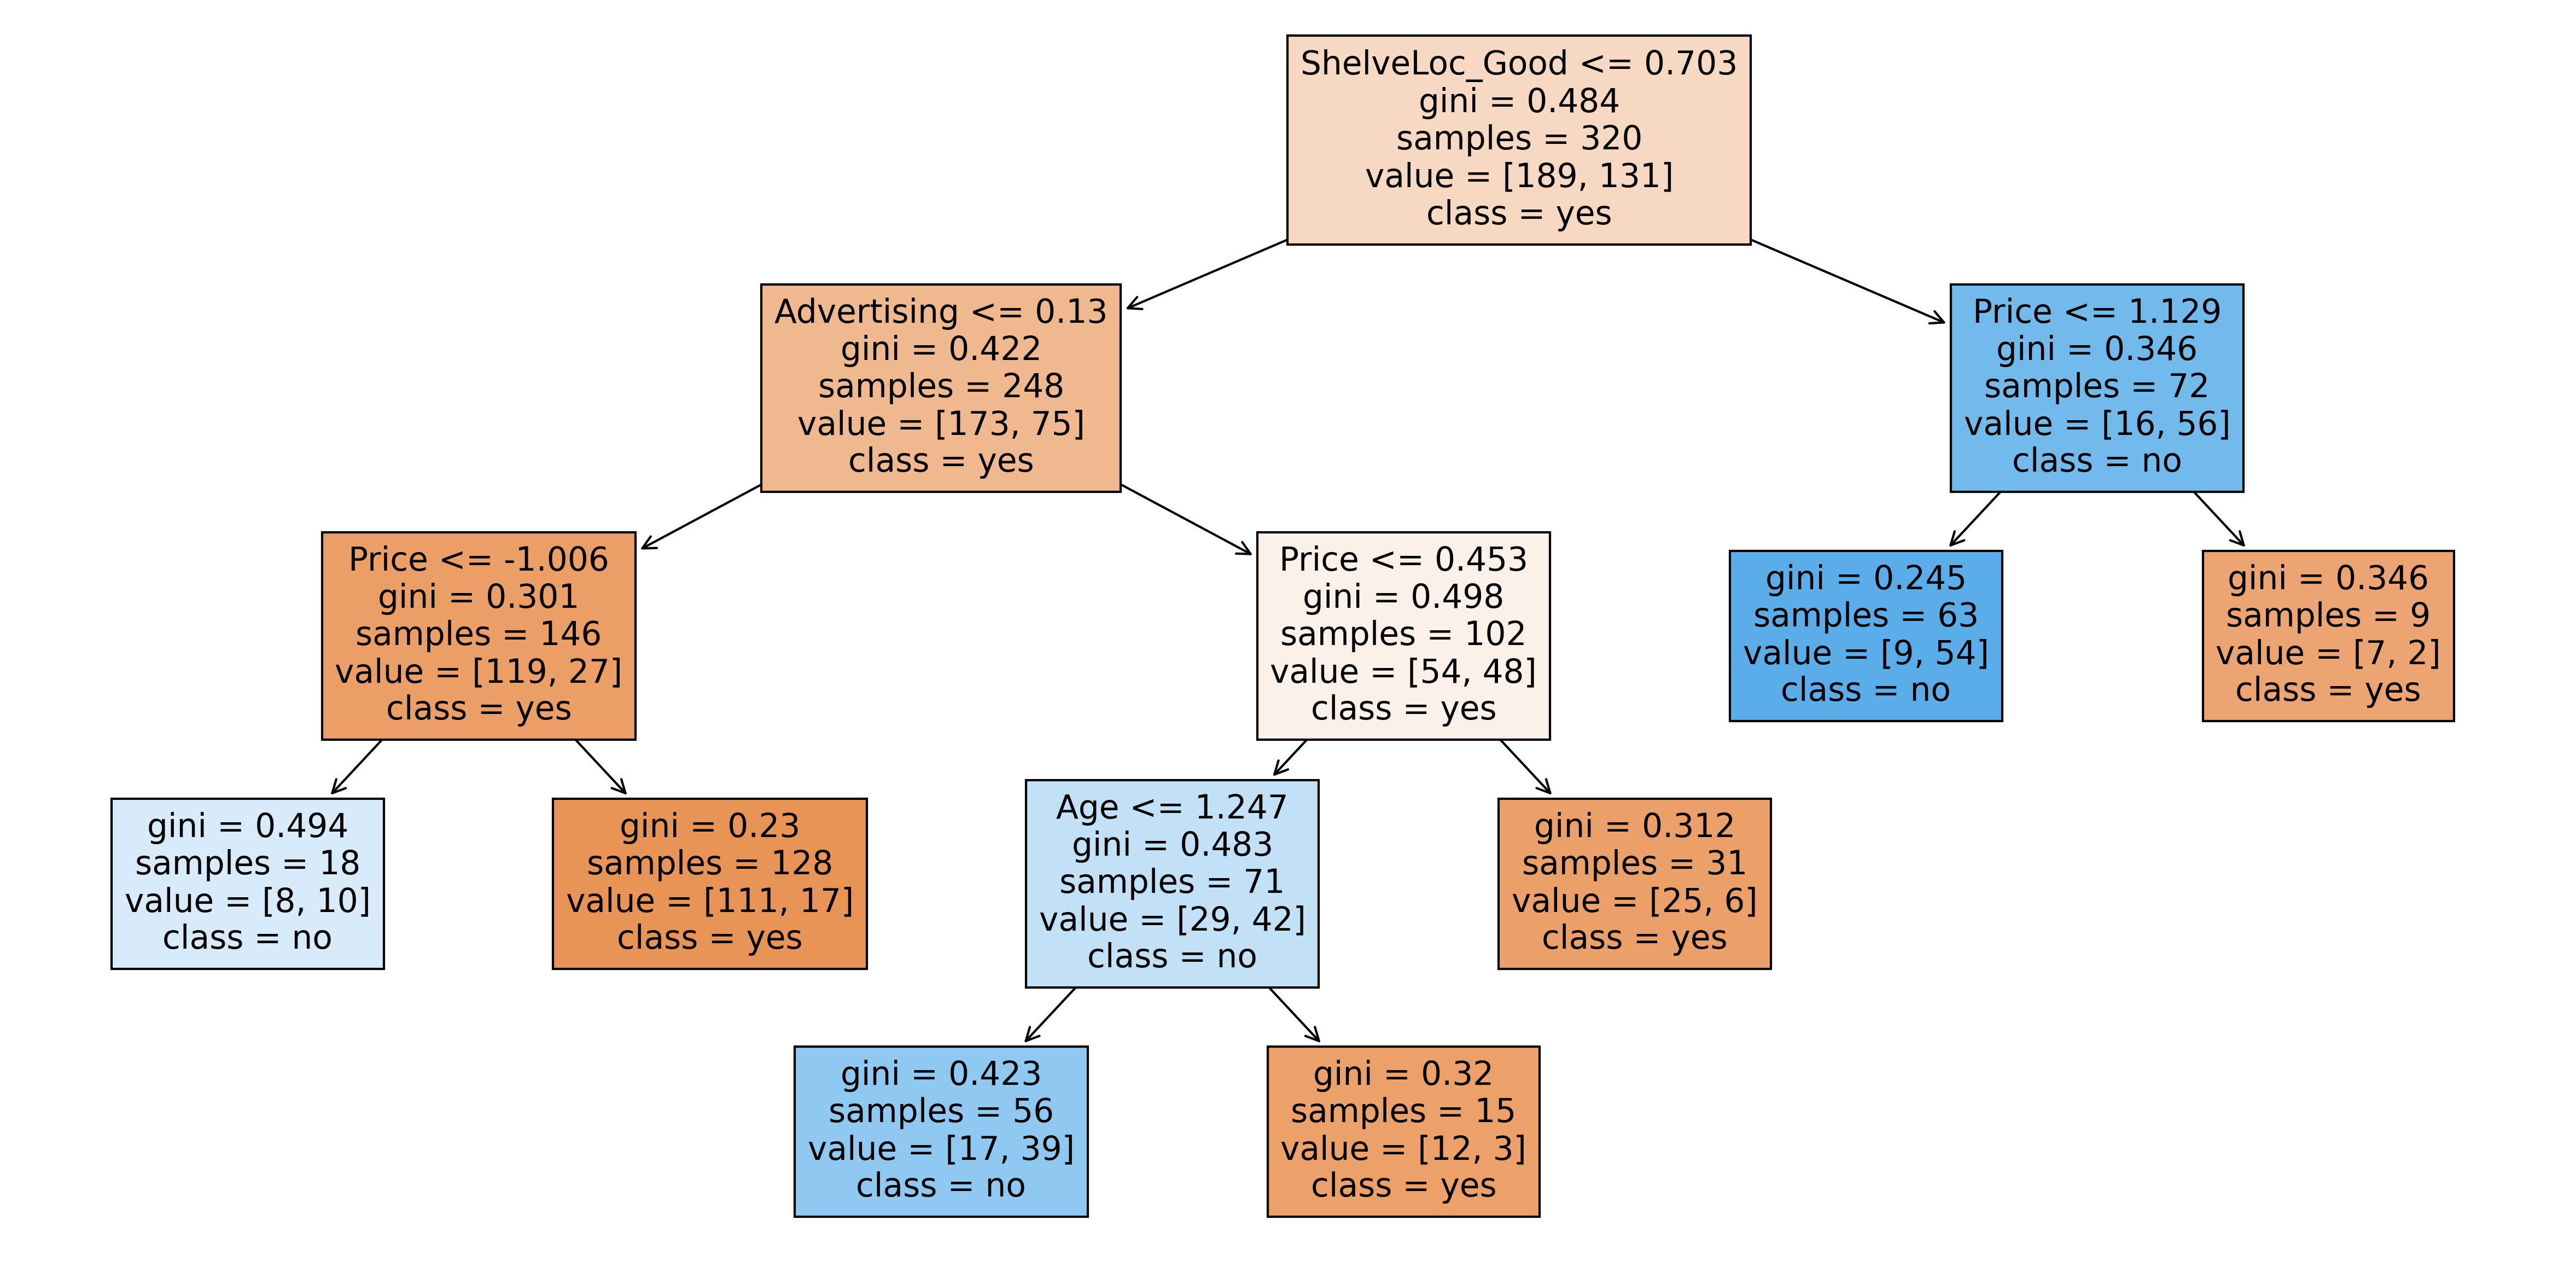

In [65]:
from sklearn import tree

features = list(X.columns)
classes = list(y.Sales.unique())

fig, axex = plt.subplots(nrows=1, ncols=1,figsize=(20,10), dpi=300)
tree.plot_tree(classifier,feature_names= features, class_names=classes, filled=True)
plt.show()
 

 ### Hence pruning gives a best tree